# Demonstrate a Simple Perceptron Model

We will demonstrate this with a conversion of Celcius to Farenheit

- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**

![thermometer](resources/thermometer.png)

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
print(f"Tensorflow Version - {tf.__version__}")

2023-07-25 18:53:20.900388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 18:53:21.601556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow Version - 2.12.0


## Load the Dataset

In [2]:
# Load the data as dataframe
df = pd.read_csv("resources/Celsius_to_Fahrenheit.csv")
# Check few initial rowa
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [3]:
# See the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## Visualize the data

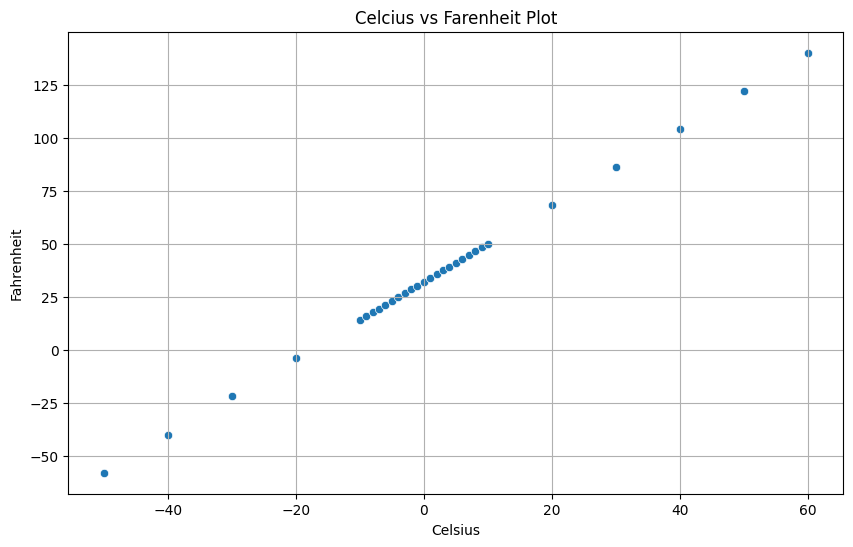

In [4]:
# Visualize the two attributes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Celsius', y='Fahrenheit', data=df)
plt.title('Celcius vs Farenheit Plot')
plt.grid(True)

## Create Test and Training Set

In [5]:
X_train = df['Celsius']
y_train = df['Fahrenheit']

print(f"Shape of Training Feature - {X_train.shape}")
print(f"Shape of target feature - {y_train.shape}")

Shape of Training Feature - (30,)
Shape of target feature - (30,)


## Build and Train the Model

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units =1, input_shape=[1])) # We will just use one neuron network

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.6), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-07-25 18:53:32.574511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 18:53:32.610919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 18:53:32.610988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 18:53:32.614786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 18:53:32.614869: I tensorflow/compile

In [7]:
# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-07-25 18:53:38.710331: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5fcc03c9c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-25 18:53:38.710381: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-07-25 18:53:38.716545: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-25 18:53:38.891744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 2s 2s/step - loss: 1101.8782
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 996.4222
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1010.6335
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 933.4466
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 869.6183
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 853.7159
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 836.2742
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 789.7877
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 738.3703
Epoch 10/100


2023-07-25 18:53:39.157043: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 11ms/step - loss: 706.1303
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 688.0240
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 662.8682
Epoch 13/100
1/1 [==============================] - 0s 9ms/step - loss: 625.0114
Epoch 14/100
1/1 [==============================] - 0s 7ms/step - loss: 586.9265
Epoch 15/100
1/1 [==============================] - 0s 8ms/step - loss: 559.6861
Epoch 16/100
1/1 [==============================] - 0s 11ms/step - loss: 540.1332
Epoch 17/100
1/1 [==============================] - 0s 10ms/step - loss: 517.2114
Epoch 18/100
1/1 [==============================] - 0s 8ms/step - loss: 487.3529
Epoch 19/100
1/1 [==============================] - 0s 8ms/step - loss: 457.2672
Epoch 20/100
1/1 [==============================] - 0s 8ms/step - loss: 433.7433
Epoch 21/100
1/1 [==============================] - 0s 11ms/step - loss: 415.3769
Epoch 22/100
1/1 [===================

## Evaluating the Model

In [8]:
# The tained model object has many keys - which is a dictionary
epochs_hist.history.keys()

dict_keys(['loss'])

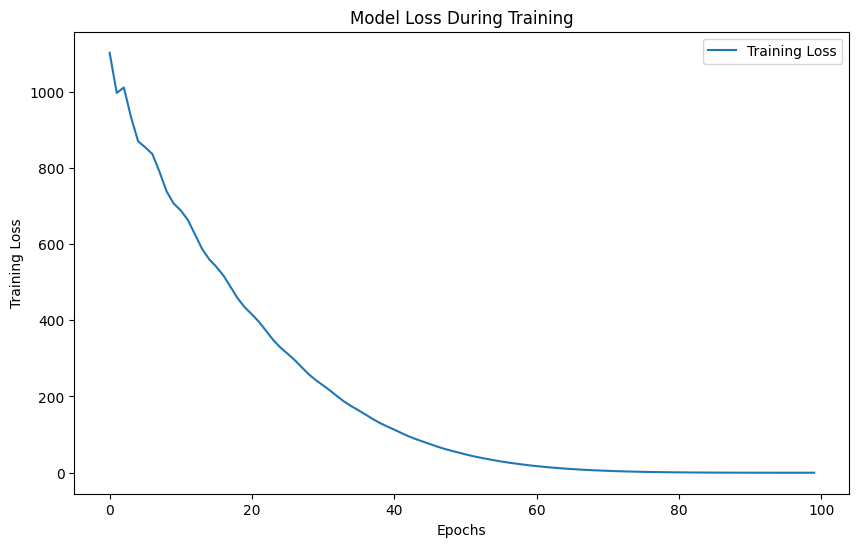

In [9]:
# Plot the Loss progress during training
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [10]:
# Check the weights
model.get_weights()

[array([[1.7976339]], dtype=float32), array([32.058598], dtype=float32)]

1/1 [==============================] - 0s 56ms/step


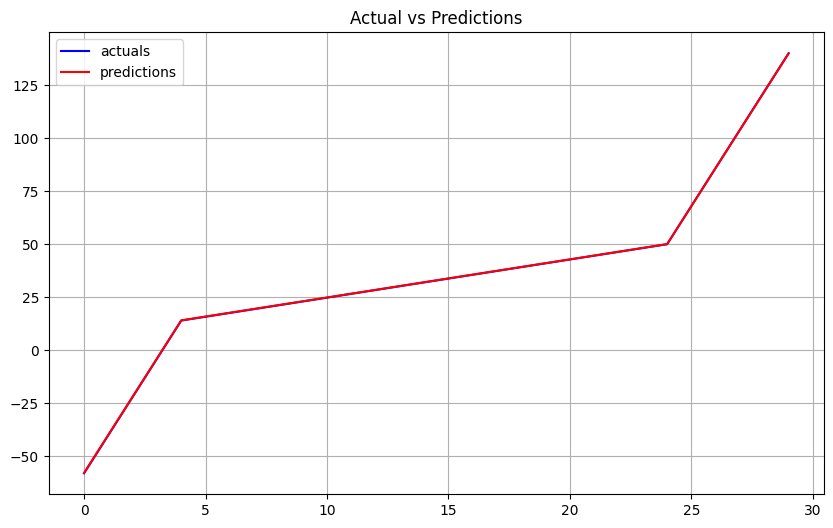

In [11]:
predictions = model.predict([X_train])

# We will plot the predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(y_train, color='b')
plt.plot(predictions, color='r')
plt.legend(['actuals', 'predictions'])
plt.title('Actual vs Predictions')
plt.grid(True)

In [12]:
# We will use the trained model to perform predictions
Temp_C = -32
Temp_F = model.predict([Temp_C])
print(f"Prediction using the trained Model - {Temp_F}")

1/1 [==============================] - 0s 47ms/step
Prediction using the trained Model - [[-25.465687]]


In [13]:
# Lets verify this with the equation
Temp_F = 9/5 * Temp_C + 32
print(f"Prediction using the equation - {Temp_F}")

Prediction using the equation - -25.6
